<a href="https://colab.research.google.com/github/ivynasantino/vies-discursos-deputados/blob/master/repots/word_cloud_previdencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de discursos dos deputados para PEC 06/2019 - Reforma da previdência

In [0]:
#@title Imports
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
#@title Base de dados
comissao_especial = pd.read_csv("https://raw.githubusercontent.com/ivynasantino/vies-discursos-deputados/master/data/all_discursos_comissao_especial.csv")
ccjc = pd.read_csv("https://raw.githubusercontent.com/ivynasantino/vies-discursos-deputados/master/data/all_discursos_ccjc.csv")
plenario = pd.read_csv("https://raw.githubusercontent.com/ivynasantino/vies-discursos-deputados/master/data/all_discursos_plenario.csv")


### Funções auxiliares

In [42]:
nltk.download('stopwords')

# removendo stopwords
default_stopwords = set(stopwords.words('portuguese'))
stopwords_complement = ["Presidente", "presidente", "exa", "Exa", "aqui", "sr", "Sr", "neste","és", "é", "somos", "sois", "são", "era", "eras", "éreis", "foste", "fostes", "foras",	"fôreis",	"serás", "sereis", "serão",	"serias", "seríeis", "sejas", "sejais", "fosses", "fôsseis", "fores", "fordes", "sê", "sejas", "sejais", "ser", "seres", "sermos",	"serdes",	"serem", "sobre", "é"]

stopwords_complement.extend(default_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
for i in stopwords_complement:
  default_stopwords.add(i)

In [0]:
def cria_tokens(df):
  comment_words = ' '
  stopwords = default_stopwords
  
  for disc in df.discurso: 
    disc = str(disc) 
    tokens = disc.split() 
   
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      if words not in stopwords:
        comment_words = comment_words + words + ' '
      
  return comment_words
  

In [0]:
def word_cloud(df):
  tokens = cria_tokens(df)
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tokens)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

### Palavras mais faladas na Comissão especial

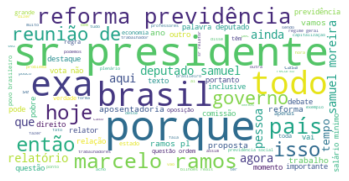

In [46]:
word_cloud(comissao_especial)

### Palavras mais faladas na CCJC

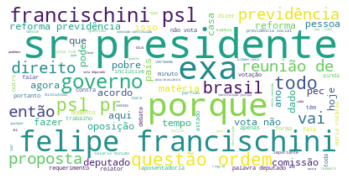

In [47]:
word_cloud(ccjc)

### Palavras mais faladas no Plenário

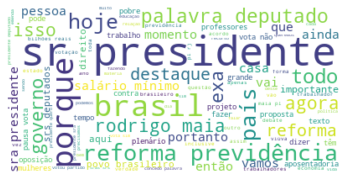

In [48]:
word_cloud(plenario)